# Week 3 Exercise

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Simple Fixed Point Iteration

Suppose that we want to solve  $$\sin x + \cos x + 2x = 0$$

1) What is a fixed point?

f(x) = x

In [36]:
# def f(x):
#     return -2 * x
# def rev_f(x):
#     return -x/2.

# def g(x):
#     return np.sin(x) + np.cos(x)

def f(x):
    return -(np.sin(x) + np.cos(x))/2.

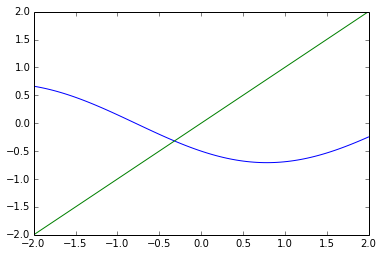

In [38]:
xs = np.linspace(-2, 2, 100)
plt.plot(xs, f(xs))
plt.plot(xs, xs)
# plt.plot(xs, g(xs))

2) Write the equation we are trying to solve in terms of fixed point equation.

3) Find the solution to the above equation using fixed point iteration. Start somewhere reasonable.

In [45]:
# x = 0.5
# for i in xrange(20):
#     y = f(x)
#     nextX = rev_f(y)
#     x = nextX
# print x

x = 0.5
for i in xrange(20):
    x = f(x)
print x

-0.318308097245


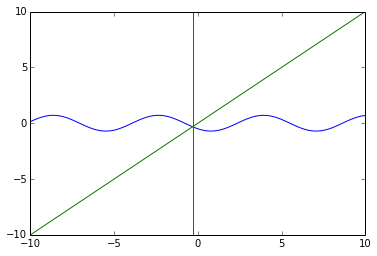

In [46]:
xs = np.linspace(-10, 10, 100)
plt.plot(xs, f(xs))
plt.plot(xs, xs)
plt.axvline(x, c='r')

4) Does it guarantee convergence? (Try solve $x^3 - x = 0$ starting at $x = 1.2$) What do you think happens?

# Convergence

1) What is convergence and how do we measure it?

For the rest of this section let's pretend that we are trying to solve 

$$x = e^{-x}$$


2) Verify graphically that the solution is at 0.56714329

3) For binomial method find $E_i$ (This is the real error not the bound on error. Yes we cheated). Plot it against i. Try starting with the bound of 0.5 and 0.6. Do it 20 times. Limit y to 1

In [182]:
def f(x):
    return np.exp(-x) - x

In [195]:
Ei = []
sol = 0.56714329

In [196]:
def bisection(ff, l, r, n):
    for i in range(n):
        c = (l + r)/2.
        
        Ei.append(np.abs(c - sol))
        
        if ff(l) * ff(c) < 0:
            r = c
        else:
            l = c
    return c

In [197]:
# plt.plot(xs, f(xs))
# plt.axhline(0, c ='r')
# plt.xlim(-5, 5)
# plt.ylim(-10, 10)

0.567143344879


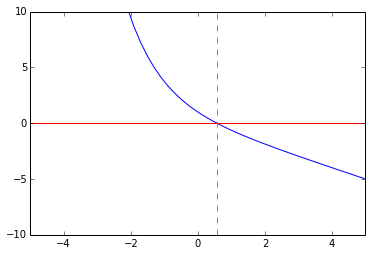

In [198]:
x_int = bisection(f, 0.5, 0.6, 20)
plt.plot(xs, f(xs))
plt.axhline(0, c ='r')
plt.axvline(x_int, c ='c', ls='--')
plt.xlim(-5, 5)
plt.ylim(-10, 10)
print x_int

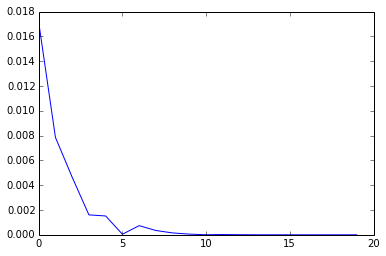

In [199]:
plt.plot(range(20), Ei)

4) Find $E_i$ for the fixed point iteration method. Do it 20 times. Start at 0.5. Plot it.

In [211]:
def f(x):
    return np.e**(-x)

In [215]:
x = 0.5
Ei = []
for i in xrange(20):
    Ei.append(np.abs(x - sol))
    x = f(x)
print x

0.567142477551


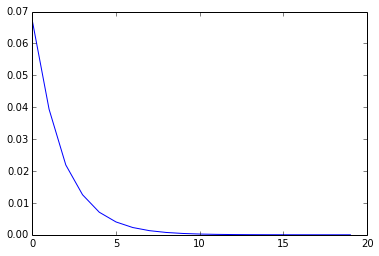

In [216]:
plt.plot(range(20), Ei)

5) Find $E_i$ for Newtons method. Do it 20 times start at 0.5. Plot it.

In [207]:
def fx(x):
    return np.e**(-x) - x

def dfx(x):
    return -np.e**(-x) - 1

In [208]:
def getNextX(x):
    return x - fx(x)/dfx(x)

In [209]:
x = 0.5
Ei = []
for i in xrange(20):
    Ei.append(np.abs(x - sol))
    x = getNextX(x)
print x

0.56714329041


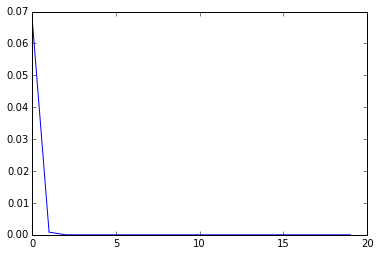

In [210]:
plt.plot(range(20), Ei)

6) Plot $E_{i+1}/E_{i}$ vs $i=0..19$ for the three methods. How should we intepret the graph? (limit y to 1)

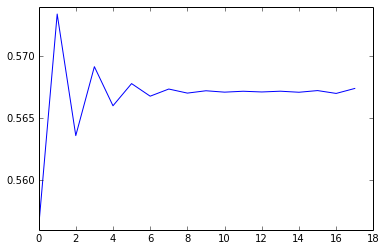

In [219]:
plt.plot(np.array(Ei[2:])/np.array(Ei[1:][:-1]))

7) Let's mathematically prove it. (Just something you should see it once in your life and forget)

8) What is quadratic convergence? Why is it better than linear convergence?

## Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [4]:
def f(x):
    return x**3

def fdx(x):
    return 3 * x**2

print fdx(0.5), (f(0.5 + 1e-6) - f(0.5))/1e-6

0.75 0.750001500016


2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [7]:
print fdx(0.5), (f(0.5 + 1e-1) - f(0.5))/1e-1

0.75 0.91


3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

4) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [5]:
def cenDif(x, h):
    return (f(x + h) - f(x - h))/(2. * h)

In [8]:
print fdx(0.5), cenDif(0.5, 1e-1)

0.75 0.76


5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.001$

In [9]:
print fdx(0.5), cenDif(0.5, 1e-3)

0.75 0.750001


6) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

(-3.141592653589793, 3.141592653589793)

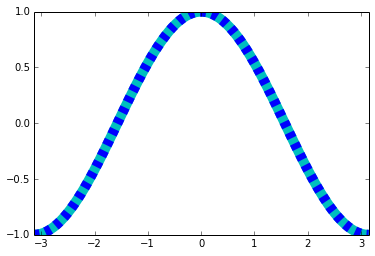

In [25]:
def f(x):
    return np.sin(x)

def fdx(x):
    return np.cos(x)

def cenDif(x, h):
    return (f(x + h) - f(x - h))/(2. * h)

h = 1e-10
xs = np.linspace(-np.pi, np.pi, 100)
ys = cenDif(xs, h)

plt.plot(xs, ys, c='c', lw=10)
plt.plot(xs, fdx(xs), c='b', ls='--', lw=10)
plt.ylim(-1, 1)
plt.xlim(-np.pi, np.pi)

7) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.5$

In [39]:
def f(x):
    return x**5
# def fdx(x):
#     return 5 * x**4

def fdxdx(x):
    return 20 * x**3

def cenDif(x, h):
    return (f(x + h) - f(x - h))/(2. * h)

def cenDifDif(x, h):
    return (cenDif(x + h, h) - cenDif(x - h, h))/(2. * h)

print fdxdx(0.5), cenDifDif(0.5, 0.05)

2.5 2.55


# Edge Detection (probably gonna be part of your homework)

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

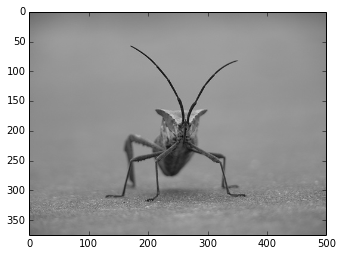

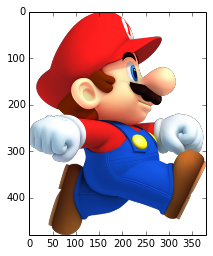

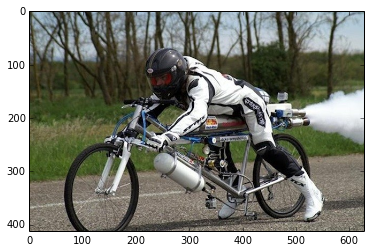

In [40]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [20]:
print stinkbug.shape
print mario.shape
print rocket.shape

(375, 500, 3)
(480, 381, 4)
(412, 628, 3)


3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

In [42]:
print mario[50, 170]

[ 1.          0.12941177  0.12156863  1.        ]


3.1) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


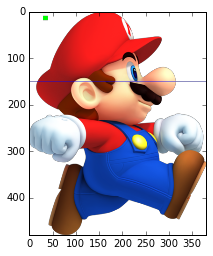

In [28]:
mario [10:20,30:40] = np.array([0,1,0,1])
plt.imshow(mario)

4) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

In [58]:

def norm(pix_1, pix_2):
    return pix_2**2 - pix_1**2

x = 80
print mario[50, 170], mario[50, x]
print norm( mario[50, 170], mario[50, x])

[ 1.          0.12941177  0.12156863  1.        ] [ 0.69411767  0.09803922  0.09803922  0.4509804 ]
[-0.51820064 -0.00713572 -0.00516724 -0.79661667]


5) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

In [85]:
def guessEdge(y, x, pic):
    def norm(pix_1, pix_2):
        return sum((pix_1 - pix_2)**2)
    return sum([
            norm(pic[y, x], pic[y + 1, x]),
            norm(pic[y, x], pic[y - 1, x]),
            norm(pic[y, x], pic[y, x + 1]),
            norm(pic[y, x], pic[y, x - 1])
            ])/4.

0.168085345133


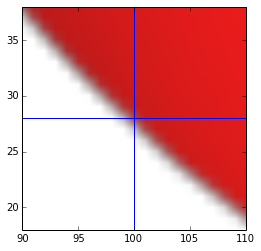

In [86]:
x = 100
y = 28
print guessEdge(y, x, mario)
plt.axvline(x)
plt.axhline(y)
plt.xlim(x - 10, x + 10)
plt.ylim(y - 10, y + 10)
plt.imshow(mario)

6) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

In [88]:
edge = np.zeros(mario.shape)
print edge.shape
ny, nx, d = mario.shape
for iy in xrange(1, ny-1):
    for ix in xrange(1, nx-1):
        edge[iy, ix] = guessEdge(iy, ix, mario)

(480, 381, 4)


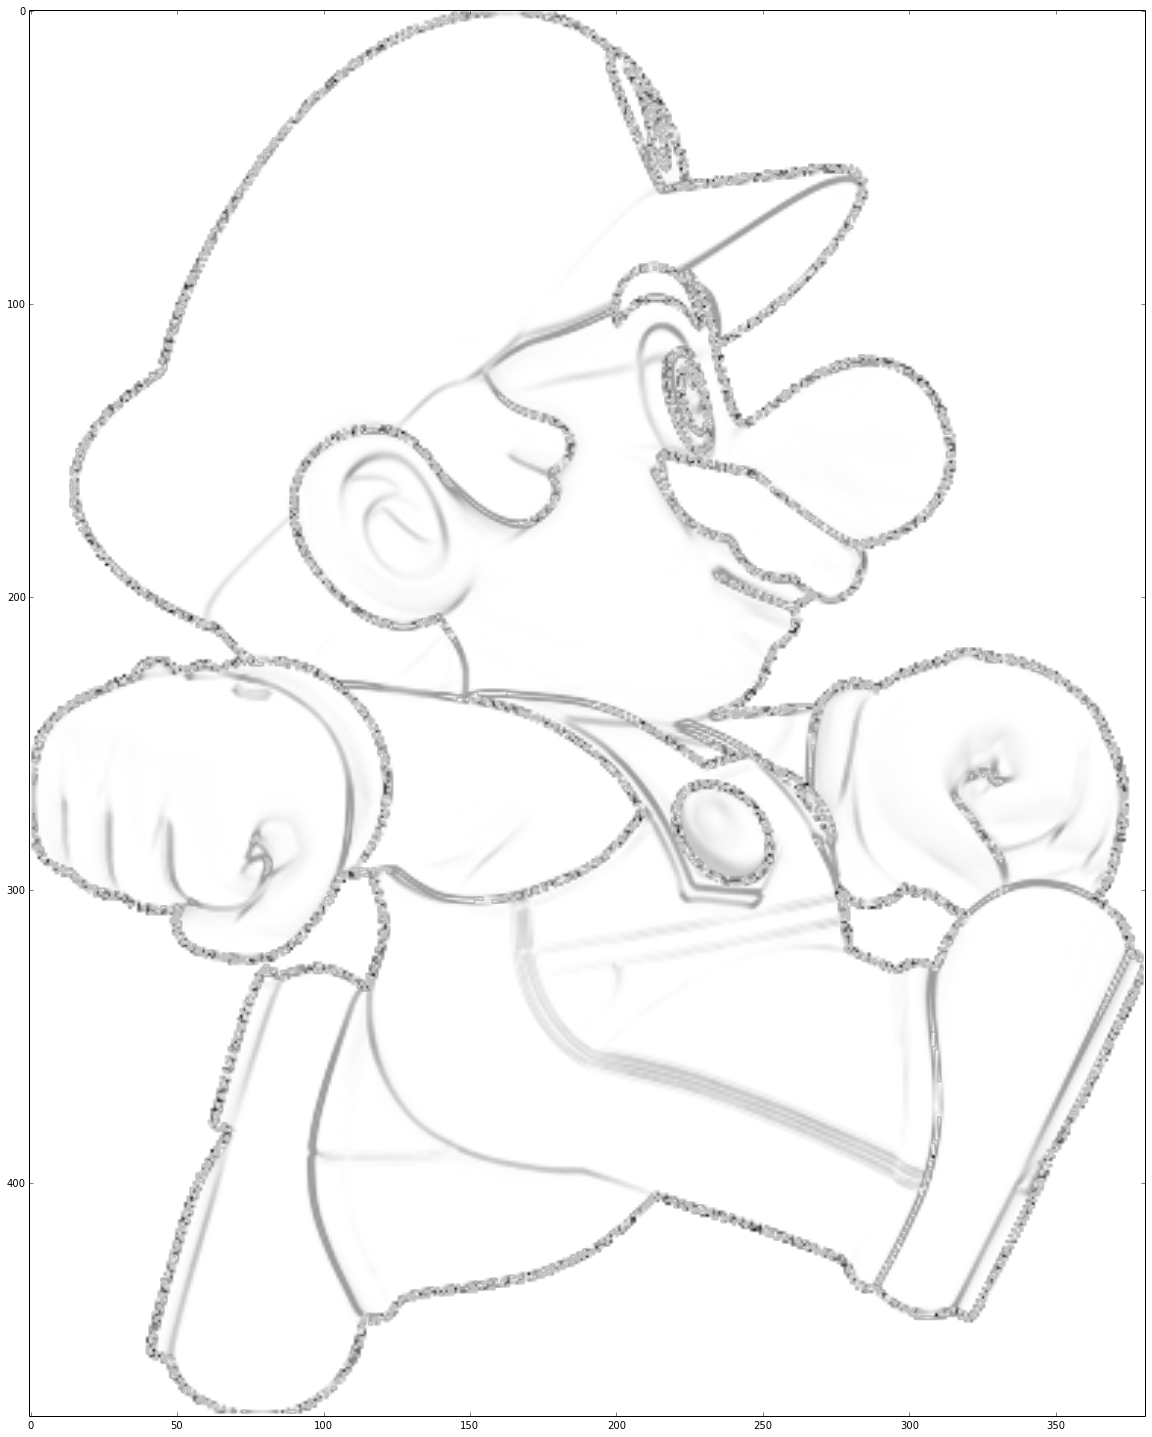

In [92]:
plt.figure(figsize=(20, 40))
plt.imshow(edge*20)

7)Show the result.

8) Wrap all these in a function and try it on other images